In [1]:
import pandas as pd
import pandas_utils as pu
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file = r"C:\git\msn_library\data\library_matching\20231031\match_top10_20231031_nih_library_pos_all_lib_MS2.mgf__19241_spectra__single_scans_comparison.csv"

In [5]:
df = pu.read_dataframe(file)
df

,adduct,adduct_match,canonical_smiles,ccs,ccs_match,compound_name,compound_name_match,equal_inchikey,formula,has_identical_inchikey,...,precursor_mz_match,rt,rt_match,score,score_match,smarts,smiles,smiles_match,split_inchikey,tanimoto_similarity
0,[M+H]+,[M+H]+,CC(C)=C1CC2(C)C(=CC1=O)CCC(O)C2C,NaN,NaN,CHEBI:181155,"NCGC00381379-01_C15H22O2_(4aR,5R,6R)-6-Hydroxy...",False,C15H22O2,False,...,235.16900,0.1655,NaN,1.0,0.823,[#6]-[#6](-[#6])=[#6]1-[#6]-[#6@@]2(-[#6])-[#6...,CC1CCC2C(C(=O)O)=CC3CC(C)(C)CC132,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,TVDMUSYVWJLIDK,0.186441
1,[M+H]+,[M+H]+,CC(C)=C1CC2(C)C(=CC1=O)CCC(O)C2C,NaN,NaN,CHEBI:181155,"NCGC00381379-01_C15H22O2_(4aR,5R,6R)-6-Hydroxy...",False,C15H22O2,False,...,235.16900,0.1655,NaN,1.0,0.823,[#6]-[#6](-[#6])=[#6]1-[#6]-[#6@@]2(-[#6])-[#6...,CC1CCC2C(C(=O)O)=CC3CC(C)(C)CC132,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,TVDMUSYVWJLIDK,0.186441
2,[M+H]+,[M-H2O+H]+,CC(C)(O)C1CCC2(C)C3C(O)C4C(C13)C42CO,NaN,NaN,CHEBI:181155,"NCGC00385861-01_C15H24O3_1,2,4-Metheno-1H-inde...",False,C15H24O3,False,...,235.16900,0.1655,NaN,1.0,0.726,[#6]-[#6](-[#6])(-[#8])-[#6]1-[#6]-[#6]-[#6]2(...,CC1CCC2C(C(=O)O)=CC3CC(C)(C)CC132,CC(C)(O)C1CCC2(C)C3C(O)C4C(C13)C42CO,ORUMCUXABQCFEG,0.150000
3,[M+H]+,[M-H2O+H]+,CC(C)(O)C1CCC2(C)C3C(O)C4C(C13)C42CO,NaN,NaN,CHEBI:181155,"NCGC00385861-01_C15H24O3_1,2,4-Metheno-1H-inde...",False,C15H24O3,False,...,235.16900,0.1655,NaN,1.0,0.726,[#6]-[#6](-[#6])(-[#8])-[#6]1-[#6]-[#6]-[#6]2(...,CC1CCC2C(C(=O)O)=CC3CC(C)(C)CC132,CC(C)(O)C1CCC2(C)C3C(O)C4C(C13)C42CO,ORUMCUXABQCFEG,0.150000
4,[M+H]+,[M+H]+,CC1=CC(=O)C(=C(C)C)CC2C1CCC2(C)O,NaN,NaN,CHEBI:181155,NCGC00385860-01_C15H22O2_3-Hydroxy-5-isopropyl...,False,C15H22O2,False,...,235.16900,0.1655,NaN,1.0,0.722,[#6]-[#6]1=[#6]-[#6](=[#8])-[#6](=[#6](-[#6])-...,CC1CCC2C(C(=O)O)=CC3CC(C)(C)CC132,CC1=CC(=O)C(=C(C)C)CC2C1CCC2(C)O,RHBOHEXDGUVIIY,0.186441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71990,[M+H]+,[M+H]+,CC(C)=C1CC2(C)C(=CC1=O)CCC(O)C2C,NaN,NaN,ISOPETASOL,"NCGC00381379-01_C15H22O2_(4aR,5R,6R)-6-Hydroxy...",True,C15H22O2,True,...,235.16900,2.4680,NaN,1.0,0.674,[#6]-[#6](-[#6])=[#6]1-[#6]-[#6@@]2(-[#6])-[#6...,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,TVDMUSYVWJLIDK,1.000000
71991,[M+H]+,[M+H]+,CC1=CC2(O)OC3(CC2=C(C)C)C(C)CCC13,NaN,NaN,ISOPETASOL,Curcumenol,False,C15H22O2,True,...,235.16900,2.4680,NaN,1.0,0.646,[#6]-[#6]1=[#6]-[#6]2(-[#8])-[#8]-[#6]3(-[#6]-...,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,CC1=CC2(O)OC3(CC2=C(C)C)C(C)CCC13,ISFMXVMWEWLJGJ,NaN
71992,[M+H]+,[M+H]+,CC1=CC2(O)OC3(CC2=C(C)C)C(C)CCC13,NaN,NaN,ISOPETASOL,Curcumenol,False,C15H22O2,True,...,235.16925,2.4680,NaN,1.0,0.646,[#6]-[#6]1=[#6]-[#6]2(-[#8])-[#8]-[#6]3(-[#6]-...,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,CC1=CC2(O)OC3(CC2=C(C)C)C(C)CCC13,ISFMXVMWEWLJGJ,NaN
71993,[M+H]+,[M-H2O+H]+,C=C1CC(O)C(O)C(C)C(=O)CC2C1CC2(C)C,NaN,NaN,ISOPETASOL,"Massbank:AC000285 Walleminone|(1R,4S,5S,6R,9R)...",False,C15H24O3,True,...,235.16900,2.4680,NaN,1.0,0.634,[#6]=[#6]1-[#6]-[#6@@H](-[#8])-[#6@@H](-[#8])-...,CC(C)=C1C[C@@]2(C)C(=CC1=O)CC[C@@H](O)[C@@H]2C,C=C1C[C@@H](O)[C@@H](O)[C@H](C)C(=O)C[C@@H]2[C...,NGQXJSTYWWTPOG,NaN


In [6]:
def best_scores_for_unique(df, unique_column):
  tanimoto_df = df[["tanimoto_similarity", "mces", "id", "adduct", "smiles", "compound_name", "compound_name_match", "equal_inchikey", "inchikey", "inchikey_match", "score_match", "match"]].sort_values(by=["tanimoto_similarity", "score_match"], ascending=(False, False)).drop_duplicates(subset=unique_column, keep="first")

  mces_df = df[["tanimoto_similarity", "mces",  "id", "compound_name_match", "inchikey", "inchikey_match", "score_match"]].sort_values(by=["mces", "score_match"], ascending=(True, False)).drop_duplicates(subset=unique_column, keep="first")

  merged = pd.merge(tanimoto_df, mces_df, on=unique_column, suffixes=("_best_tanimoto", "_best_mces"))
  merged["best_tanimoto"] = merged[["tanimoto_similarity_best_tanimoto", "tanimoto_similarity_best_mces"]].max(axis=1)
  merged["best_mces"] = merged[["mces_best_tanimoto", "mces_best_mces"]].max(axis=1)
  
  remove_columns = ["id_best_mces", "inchikey_best_mces"]
  merged = merged[merged.columns[~merged.columns.isin(remove_columns)]]
  return merged

In [7]:
# merged["same_tanimoto"] = merged["tanimoto_similarity_best_tanimoto"] == merged["tanimoto_similarity_best_mces"]
# merged[["tanimoto_similarity_best_tanimoto", "tanimoto_similarity_best_mces", "best_tanimoto", "same_tanimoto"]][merged['same_tanimoto'] == False]

In [8]:
merge_id = best_scores_for_unique(df, unique_column="id")
merge_id

,tanimoto_similarity_best_tanimoto,mces_best_tanimoto,id,adduct,smiles,compound_name,compound_name_match_best_tanimoto,equal_inchikey,inchikey_best_tanimoto,inchikey_match_best_tanimoto,score_match_best_tanimoto,match,tanimoto_similarity_best_mces,mces_best_mces,compound_name_match_best_mces,inchikey_match_best_mces,score_match_best_mces,best_tanimoto,best_mces
0,1.0,0.0,3583,[M+H]+,C[C@@H]1O[C@@H](Oc2cc(O)c3c(=O)c(O[C@@H]4O[C@@...,Kaempferitrin,"Kaempferitrin, 3-Rha-7-Rha Kaempferol, Kaempfe...",True,PUPKKEQDLNREIM-QNSQPKOQSA-N,PUPKKEQDLNREIM-QNSQPKOQSA-N,0.995,True,1.0,0.0,"Kaempferitrin, 3-Rha-7-Rha Kaempferol, Kaempfe...",PUPKKEQDLNREIM-QNSQPKOQSA-N,0.995,1.0,0.0
1,1.0,0.0,14472,[M+H]+,O=C(/C=C/C=C/c1cc2c(cc1)OCO2)N1CCCCC1,piperine,Piperine,True,MXXWOMGUGJBKIW-YPCIICBESA-N,MXXWOMGUGJBKIW-YPCIICBESA-N,0.992,True,1.0,0.0,Piperine,MXXWOMGUGJBKIW-YPCIICBESA-N,0.992,1.0,0.0
2,1.0,0.0,14475,[M+H]+,O=C(/C=C/C=C/c1cc2c(cc1)OCO2)N1CCCCC1,piperine,Piperine,True,MXXWOMGUGJBKIW-YPCIICBESA-N,MXXWOMGUGJBKIW-YPCIICBESA-N,0.992,True,1.0,0.0,Piperine,MXXWOMGUGJBKIW-YPCIICBESA-N,0.992,1.0,0.0
3,1.0,0.0,7896,[M+H]+,CC(C)=CCc1c(-c2c(O)cc(O)cc2)oc2c(CC=C(C)C)c(O)...,Mulberrin,Kuwanon C,True,UWQYBLOHTQWSQD-UHFFFAOYSA-N,UWQYBLOHTQWSQD-UHFFFAOYSA-N,0.992,True,1.0,0.0,Kuwanon C,UWQYBLOHTQWSQD-UHFFFAOYSA-N,0.992,1.0,0.0
4,1.0,0.0,4258,[M+H]+,CC1CC(=O)C2=C(CCC3(O)C2C(=O)c2c(c(O)ccc2)C3O)C1,Panglimycin C,"6a,7,8-trihydroxy-3-methyl-3,4,5,6,7,12a-hexah...",True,CRULJZWXPCYLAC-UHFFFAOYSA-N,CRULJZWXPCYLAC-UHFFFAOYSA-N,0.991,True,1.0,0.0,"6a,7,8-trihydroxy-3-methyl-3,4,5,6,7,12a-hexah...",CRULJZWXPCYLAC-UHFFFAOYSA-N,0.991,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19236,NaN,NaN,3444,[M-H2O+H]+,COc1cc(-c2c(C)cc(C(=O)O)oc2=O)c(C(=O)O)c(O)c1,alternarian acid,NaN,False,DTWGKAWUEOJXKI-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19237,NaN,NaN,3445,[M-H2O+H]+,COc1cc(-c2c(C)cc(C(=O)O)oc2=O)c(C(=O)O)c(O)c1,alternarian acid,NaN,False,DTWGKAWUEOJXKI-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19238,NaN,NaN,3446,[M-H2O+H]+,COc1cc(-c2c(C)cc(C(=O)O)oc2=O)c(C(=O)O)c(O)c1,alternarian acid,NaN,False,DTWGKAWUEOJXKI-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19239,NaN,NaN,3447,[M-H2O+H]+,COc1cc(-c2c(C)cc(C(=O)O)oc2=O)c(C(=O)O)c(O)c1,alternarian acid,NaN,False,DTWGKAWUEOJXKI-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
merge_id[["id", "best_tanimoto", "tanimoto_similarity_best_mces", "best_mces", "mces_best_tanimoto", "score_match_best_tanimoto", "score_match_best_mces"]]

,id,best_tanimoto,tanimoto_similarity_best_mces,best_mces,mces_best_tanimoto,score_match_best_tanimoto,score_match_best_mces
0,33875,1.0,1.0,0.0,0.0,1.000,1.000
1,36326,1.0,1.0,0.0,0.0,0.999,0.999
2,35486,1.0,1.0,0.0,0.0,0.999,0.999
3,8103,1.0,1.0,0.0,0.0,0.998,0.998
4,34238,1.0,1.0,0.0,0.0,0.998,0.998
...,...,...,...,...,...,...,...
36754,20669,NaN,NaN,NaN,NaN,NaN,NaN
36755,20670,NaN,NaN,NaN,NaN,NaN,NaN
36756,20671,NaN,NaN,NaN,NaN,NaN,NaN
36757,20672,NaN,NaN,NaN,NaN,NaN,NaN


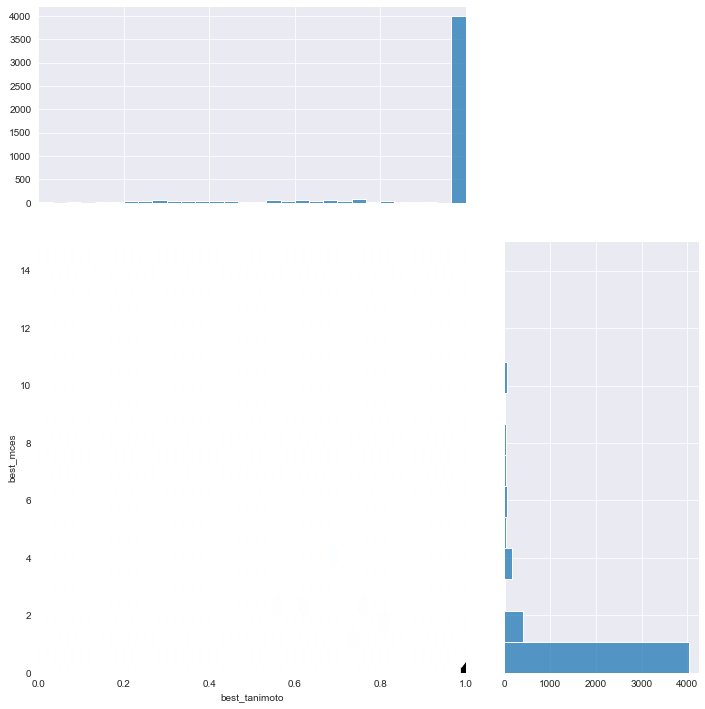

In [79]:
sns.jointplot(data=merge_id, x="best_tanimoto", y="best_mces", kind="hex", ylim=(0, 15), xlim=(0, 1), height=10, ratio=2, marginal_ticks=True, marginal_kws=dict(bins=30))

In [ ]:
# ax = sns.histplot(df, x="mces", binwidth=0.25)
# ax.set_xlim((0, 15))

## unique compounds best scores

In [70]:
merge_inchikey = best_scores_for_unique(df, unique_column="inchikey")

In [71]:
merge_inchikey

,tanimoto_similarity_best_tanimoto,mces_best_tanimoto,id_best_tanimoto,adduct,smiles,compound_name,compound_name_match_best_tanimoto,equal_inchikey,inchikey,inchikey_match_best_tanimoto,score_match_best_tanimoto,match,tanimoto_similarity_best_mces,mces_best_mces,compound_name_match_best_mces,inchikey_match_best_mces,score_match_best_mces,best_tanimoto,best_mces
0,1.0,0.0,33875,[M-H]-,Oc1c(Sc2c(O)c(Cl)cc(Cl)c2)cc(Cl)cc1Cl,bithionol,"Massbank:LU136452 Bithionol|2,4-dichloro-6-(3,...",True,JFIOVJDNOJYLKP-UHFFFAOYSA-N,JFIOVJDNOJYLKP-UHFFFAOYSA-N,1.000,True,1.0,0.0,"Massbank:LU136452 Bithionol|2,4-dichloro-6-(3,...",JFIOVJDNOJYLKP-UHFFFAOYSA-N,1.000,1.0,0.0
1,1.0,0.0,36326,[M-H]-,NCCS(=O)(=O)O,taurine,Taurine; LC-tDDA; CE10,True,XOAAWQZATWQOTB-UHFFFAOYSA-N,XOAAWQZATWQOTB-UHFFFAOYSA-N,0.999,True,1.0,0.0,Taurine; LC-tDDA; CE10,XOAAWQZATWQOTB-UHFFFAOYSA-N,0.999,1.0,0.0
2,1.0,0.0,35486,[M-H]-,Sc1nc2ccccc2s1,149-30-4,2-Mercaptobenzothiazole,True,YXIWHUQXZSMYRE-UHFFFAOYSA-N,YXIWHUQXZSMYRE-UHFFFAOYSA-N,0.999,True,1.0,0.0,2-Mercaptobenzothiazole,YXIWHUQXZSMYRE-UHFFFAOYSA-N,0.999,1.0,0.0
3,1.0,0.0,8103,[M-H]-,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,sulfathiazole,Sulfathiazole,True,JNMRHUJNCSQMMB-UHFFFAOYSA-N,JNMRHUJNCSQMMB-UHFFFAOYSA-N,0.998,True,1.0,0.0,Sulfathiazole,JNMRHUJNCSQMMB-UHFFFAOYSA-N,0.998,1.0,0.0
4,1.0,0.0,34238,[M-H]-,COc1c(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...,glyburide,Glybenclamide,True,ZNNLBTZKUZBEKO-UHFFFAOYSA-N,ZNNLBTZKUZBEKO-UHFFFAOYSA-N,0.998,True,1.0,0.0,Glybenclamide,ZNNLBTZKUZBEKO-UHFFFAOYSA-N,0.998,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,NaN,NaN,14895,[M-H]-,CC(C)CC(=O)Nc1cncc(-c2cc3c(cc2)[nH]nc3-c2nc3c(...,Adavivint,NaN,False,AQDWDWAYVBQMAM-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4538,NaN,NaN,4635,[M-H]-,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,Gap19,NaN,False,IEAKEKFIXUZWEH-PKMKMBMKSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4539,NaN,NaN,18228,[M-H]-,O=P(O)(O)CP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(NCc4...,PSB-12379,NaN,False,DMBYYIJBPDWQFF-SCFUHWHPSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4540,NaN,NaN,9378,[M+FA]-,CN(C)CCNC(=O)COc1c2cccc1Cc1cccc(c1OCC(=O)NCCN(...,OTX008,NaN,False,CQVAQQNDZCZBSU-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


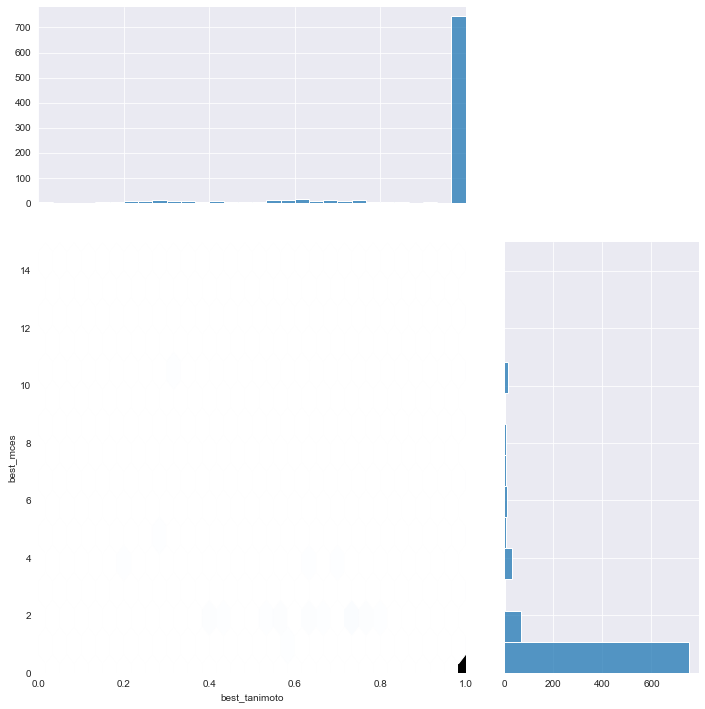

In [78]:
sns.jointplot(data=merge_inchikey, x="best_tanimoto", y="best_mces", kind="hex", ylim=(0, 15), xlim=(0, 1), height=10, ratio=2, marginal_ticks=True, marginal_kws=dict(bins=30))